In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [13]:
# Use the `StandardScaler()` module from scikit-learn to normalize selected data columns from the CSV file
selected_columns = ['price_change_percentage_24h', 'price_change_percentage_7d',
                    'price_change_percentage_14d', 'price_change_percentage_30d',
                    'price_change_percentage_60d', 'price_change_percentage_200d',
                    'price_change_percentage_1y']

df_market_data_scaled = StandardScaler().fit_transform(df_market_data[selected_columns])

# Create a DataFrame with the scaled data
df_market_scaled = pd.DataFrame(df_market_data_scaled, 
                                columns=selected_columns, 
                                index=df_market_data.index)

# Display sample scaled data
df_market_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [14]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(df_scaled, columns=df_market_data.columns)

# Copy the crypto names from the original data
df_scaled['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_scaled.set_index('coin_id', inplace=True)

# Display sample data
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [15]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [17]:
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia_values = []

# Assuming k_values is defined elsewhere in your code
k_values = range(1, 12)  # for example, 1 to 11

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters and explicitly set n_init=10
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=42)
    
    # Fit the model to the data
    kmeans_model.fit(df_market_data_scaled)  # assuming df_market_data_scaled is correctly defined
    
    # Append the model's inertia to the inertia list
    inertia_values.append(kmeans_model.inertia_)

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'K': k_values,
    'Inertia': inertia_values
}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

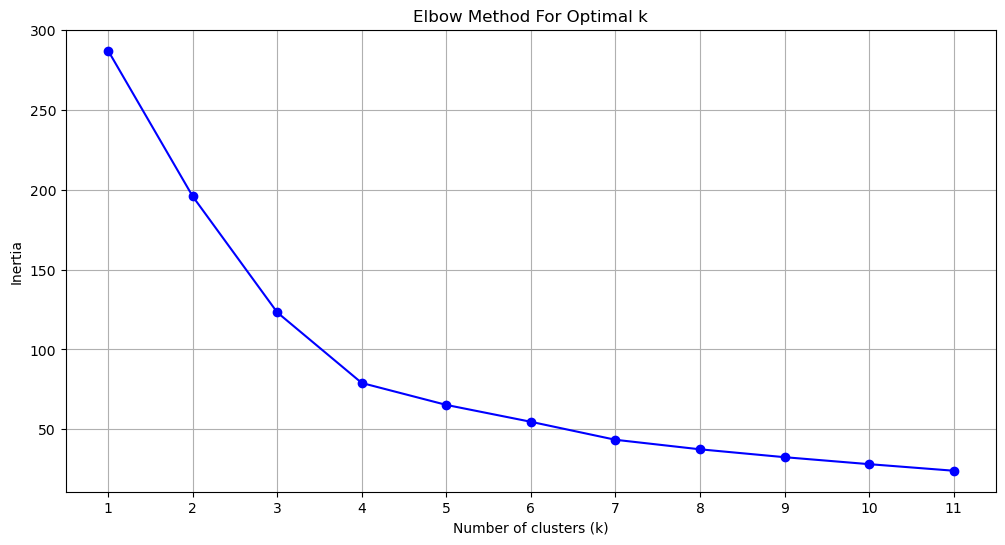

In [18]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


import matplotlib.pyplot as plt

# Plotting the inertia values to find the elbow
plt.figure(figsize=(12, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:  4** 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [21]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, n_init=10, random_state=0)


In [22]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_market_scaled)


KMeans(n_clusters=4, n_init=10, random_state=0)

In [23]:
# Predict the clusters to group the cryptocurrencies using the scaled data

clusters = kmeans_model.predict(df_market_scaled)

# Print the resulting array of cluster values.
print(clusters)






[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [24]:
# Create a copy of the DataFrame
df_market_with_clusters = df_market_scaled.copy()

In [25]:
# Add a new column to the DataFrame with the predicted clusters
df_market_scaled['cluster'] = clusters

# Display sample data
df_market_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [53]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.



scatter_plot_one = df_market_scaled.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster",
    hover_cols=["coin_id"],
    colormap="Category10",
    height=400,
    width=400,
    title="Cryptocurrency Clusters"
)

# Display the scatter plot
scatter_plot_one


:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [30]:
from sklearn.decomposition import PCA
import numpy as np

# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [32]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

df_pca = pca.fit_transform(df_market_scaled)

df_pca = pd.DataFrame(
    df_pca,
    columns=["PC1", "PC2", "PC3"],
    index=df_market_scaled.index
)



# View the first five rows of the DataFrame. 
df_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,1.194082,-0.902074,-0.585338
ethereum,1.009706,-0.663584,-1.136950
tether,-0.722536,-0.307632,0.721813
ripple,-0.748266,-0.332379,0.558479
bitcoin-cash,2.258539,-1.826966,-1.378166


In [33]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_


In [34]:
total_explained_variance = np.sum(explained_variance_ratio)
print("Total explained variance of the three principal components:", total_explained_variance)

Total explained variance of the three principal components: 0.8867743104975919


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer: 89%** 

In [35]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
pca_columns = ['PC1', 'PC2', 'PC3']
df_pca = pd.DataFrame(market_pca, columns=pca_columns)

# Copy the crypto names from the original data
df_pca['coin_id'] = df_market_scaled.index


# Set the coinid column as index
df_pca.set_index('coin_id', inplace=True)


# Display sample data
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,1.194082,-0.902074,-0.585338
ethereum,1.009706,-0.663584,-1.136950
tether,-0.722536,-0.307632,0.721813
ripple,-0.748266,-0.332379,0.558479
bitcoin-cash,2.258539,-1.826966,-1.378166


---

### Find the Best Value for k Using the PCA Data

In [36]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [38]:
# Create an empty list to store the inertia values
inertia_list = []


# Create a for loop to compute the inertia with each possible value of k

for k in k_values:
    
    
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)


# 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(df_pca)


# 3. Append the model.inertia_ to the inertia list
    inertia_list.append(kmeans.inertia_)






In [50]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_list}

# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_plot = pd.DataFrame(elbow_data)


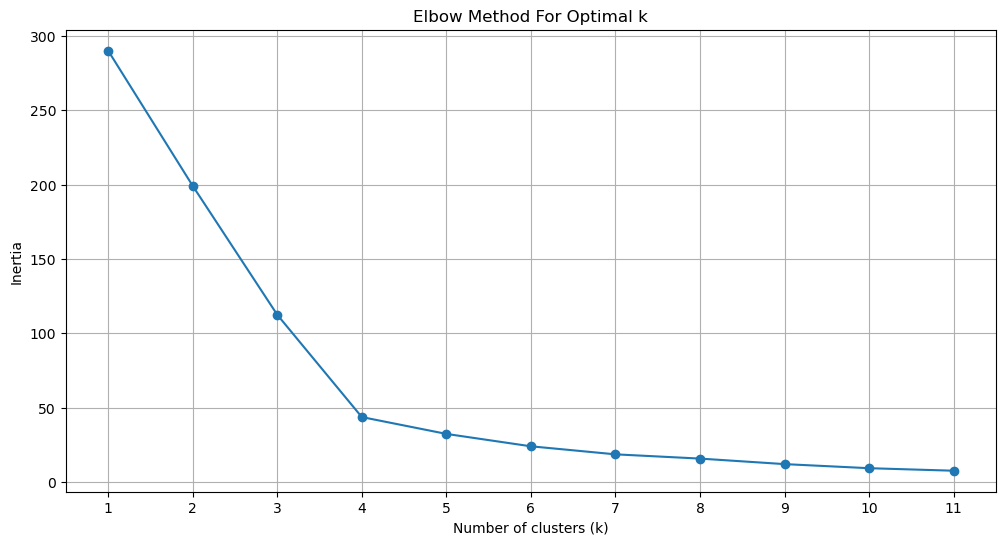

In [51]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

# Assuming elbow_df is the DataFrame with 'k' and 'inertia' from the previous step
plt.figure(figsize=(12, 6))
plt.plot(elbow_pca_plot['k'], elbow_pca_plot['inertia'], marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_pca_plot['k'])
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**  4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  No, it does not. The best K value in original data was 4 and based on elbow curve plot the best k value is 4.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [44]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=3, n_init=10, random_state=0)


In [45]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_pca)


KMeans(n_clusters=3, n_init=10, random_state=0)

In [46]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_pca.predict(df_pca)

# Print the resulting array of cluster values.
print(clusters_pca)


[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 1
 0 0 0 0]


In [47]:
# Create a copy of the DataFrame with the PCA data
df_pca_with_clusters = df_pca.copy()


# Add a new column to the DataFrame with the predicted clusters
df_pca_with_clusters['Cluster'] = clusters_pca


# Display sample data
print(df_pca_with_clusters.head())


                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin       1.194082 -0.902074 -0.585338        1
ethereum      1.009706 -0.663584 -1.136950        1
tether       -0.722536 -0.307632  0.721813        0
ripple       -0.748266 -0.332379  0.558479        0
bitcoin-cash  2.258539 -1.826966 -1.378166        1


In [54]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_two = df_pca_with_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['coin_id'],
    title="PCA Cluster Plot"
)
scatter_plot_two

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [52]:
# Composite plot to contrast the Elbow curves

composite_elbow_plot = elbow_df + elbow_pca_plot


In [55]:
# Composite plot to contrast the clusters
composite_cluster_plot = scatter_plot_one + scatter_plot_two

In [56]:
composite_elbow_plot

,k,inertia
0,2,580.036914
1,4,398.216106
2,6,224.802402
3,8,87.172866
4,10,64.510533
5,12,47.831861
6,14,37.019665
7,16,31.306293
8,18,23.879128
9,20,18.378966


In [57]:
composite_cluster_plot

:Layout
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using PCA for K-Means clustering simplifies the model by reducing dimensionality, which can lead to clearer visualization and faster computation. However, this process may also discard relevant information if significant variance is lost. The PCA Cluster Plot suggests that clusters might be more distinct post-PCA, indicating effective capture of variance. Ultimately, the choice to use PCA hinges on balancing model simplicity against the potential loss of nuanced data details.